In [81]:
from climada.util.api_client import Client
from datetime import datetime
import numpy as np
client = Client()

In [84]:
tc_haiti = client.get_hazard('tropical_cyclone', properties={'country_iso3alpha': 'HTI', 
                                                             'climate_scenario': 'historical',
                                                             'spatial_coverage': 'country'})                                                     
tc_haiti = tc_haiti.select(orig=True)                                                             

https://climada.ethz.ch/data-api/v1/dataset	climate_scenario=historical	country_iso3alpha=HTI	data_type=tropical_cyclone	limit=100000	name=None	spatial_coverage=country	status=active	version=None
2022-07-21 14:52:43,621 - climada.hazard.base - INFO - Reading /Users/evelynm/climada/data/hazard/tropical_cyclone/tropical_cyclone_10synth_tracks_150arcsec_HTI_1980_2020/v2/tropical_cyclone_10synth_tracks_150arcsec_HTI_1980_2020.hdf5


In [85]:
tc_haiti = tc_haiti.select(orig=True)

In [86]:
startdate_str = '01-01-2000'
date_object = datetime.strptime(startdate_str, '%d-%m-%Y').date()
startdate_ordinal = date_object.toordinal()

enddate_str = '31-12-2018'
date_object = datetime.strptime(enddate_str, '%d-%m-%Y').date()
enddate_ordinal = date_object.toordinal()

In [87]:
date_selectors = (tc_haiti.date>=startdate_ordinal)&(tc_haiti.date<=enddate_ordinal)

In [88]:
tc_haiti = tc_haiti.select(event_id=list(tc_haiti.event_id[date_selectors]))

In [93]:
inten_selectors = []
for event_id in tc_haiti.event_id:
    if tc_haiti.select(event_id=[event_id]).intensity.nnz>0:
             inten_selectors.append(event_id)
tc_haiti = tc_haiti.select(event_id=inten_selectors)

In [94]:
inten_selectors = []
for event_id in tc_haiti.event_id:
    if np.max(tc_haiti.select(event_id=[event_id]).intensity.data)>20:
             inten_selectors.append(event_id)
tc_haiti = tc_haiti.select(event_id=inten_selectors)

2022-07-21 14:54:39,961 - climada.util.plot - WARNING - Error parsing coordinate system 'GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]'. Using projection PlateCarree in plot.


<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

/Users/evelynm/opt/anaconda3/envs/climada_env/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/evelynm/opt/anaconda3/envs/climada_env/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/evelynm/opt/anaconda3/envs/climada_env/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


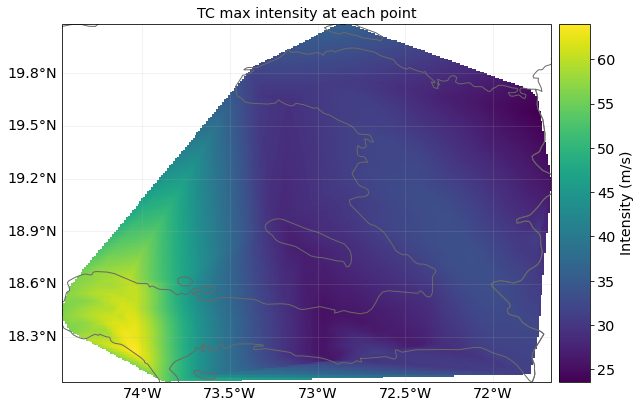

In [96]:
tc_haiti.plot_intensity(0)